In [3]:
#Import libraries
import mne 
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [164]:
#Create dictionary with all the data grouped by condition
    
#Create root folder argument for folders to loop through
root_folder = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\Epoched_Data'
os.chdir(root_folder)


DataA = {'EO':{},'EC':{},'INDUCTION':{},'SED_1':{},'SED_2':{},'SED_3':{},'SED_4':{},'EMERGENCE':{}}

for folder in os.listdir(root_folder):
    for filename in os.listdir(folder): 
        file_path = os.path.join(folder, filename)
        with open(file_path,'rb') as g:
            raw = pickle.load(g)
        #Get the participant ID
        ID = filename.split('_',maxsplit=1)[0]
        #Get condition
        cond = '_'.join(filename.split('_')[1:-1])
        if 'EC' in cond:
            cond = 'EC'
        elif 'EO' in cond:
            cond = 'EO'
        #Add array element to dictionary
        DataA[cond][ID] = raw.get_data()
nu_fold = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal' 

with open(nu_fold + '\\DataA.pkl', 'wb') as f:
        pickle.dump(DataA, f)
f.close()

In [134]:
from statistics import mean
file_path = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataB_mne.pkl"
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataB = raw.copy()

In [151]:
from statistics import mean
file_path = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataA.pkl"
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

In [20]:
%matplotlib qt

root_folder = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataB.pkl"
#Loop through all the data and group the psd by condition, then plot the comparison
psdss = [[0],[0],[0],[0],[0],[0],[0],[0]]
t = 0
for cond in DataA.keys():
    i = 0
    pitstop = list()
    #if cond not in ['INDUCTION','EMERGENCE', 'SED_2', 'SED_3', 'EC', 'EO']:
    for pers in DataB[cond]:
        psds, sfreq = mne.time_frequency.psd_array_multitaper(DataA[cond][pers],sfreq=500)
        pitstop.append(np.mean(np.mean(psds,axis=0),axis=0))
        i += 1
    psdss[t] = [np.mean(pitstop,axis=0)]
    t += 1 

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

In [2]:
import pandas as pd
import math

In [137]:
print(DataB['EO']['SD5001'])
print(DataA['EO']['SD5001'].shape)

<Epochs |  33 events (all good), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~5.7 MB, data loaded,
 '1': 33>
(33, 63, 351)


In [134]:
file_path = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataA.pkl"
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

In [16]:
#Apply 50hz notch filter
from scipy.signal import butter, filtfilt
import numpy as np

for key in DataA.keys():
    for per in DataA[key].keys():
        data = DataA[key][per]
        
       # Define the filter parameters
        nyquist_freq = 0.5 * 500 # where sample_rate is your sampling frequency
        cutoff_freq = 30  # define your cutoff frequency
        order = 5  # choose the filter order

        # Generate the filter coefficients
        normalized_cutoff = cutoff_freq / nyquist_freq
        b, a = butter(order, normalized_cutoff, btype='lowpass')

        # Apply the notch filter to the data and replace the previous data
        DataA[key][per] = filtfilt(b, a, data)
#Save the new file
with open(os.path.join('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\LowPassedData',"DataA_LowPassed.pkl"), 'wb') as f:
    pickle.dump(DataA, f) 

f.close()


In [4]:
#Convert mne objects to numpy arrays
file_path = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\BadEpochsRejected\\DataB_mne_AutoRej.pkl'
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

#Convert mne objects to numpy arrays by looping through each object and convert to numpy array
DataB = {'EO':{},'EC':{},'INDUCTION':{},'SED_1':{},'SED_2':{},'SED_3':{},'SED_4':{},'EMERGENCE':{}}

for key in DataA.keys():
    for per in DataA[key].keys():
        DataB[key][per] = DataA[key][per].get_data()

#Save the new file
with open('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\BadEpochsRejected\\DataB_AutoRej.pkl', 'wb') as f:
    pickle.dump(DataB, f)
f.close()


In [21]:
file_path = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\BadEpochsRejected\\DataB_AutoRej.pkl'
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

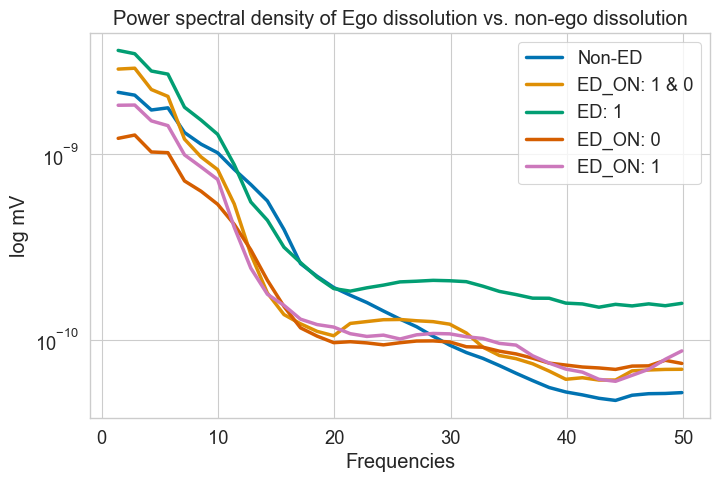

In [69]:
#### Compare ego dissolution vs. non-ego dissolution ####
import math

#First, import ratings of ego dissolution and copy DataA to a new dictionary
df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")
DataAd = DataA.copy()

#Shorten all epochs to the last minute of recording
for cond in DataAd.keys():
    for pers in DataAd[cond].keys():
        DataAd[cond][pers] = DataAd[cond][pers][-7:-1]

#Label ED or non-ED and use this to compute the psd and plot the four graphs
ket_conds = ['SED_1','SED_2','SED_3','SED_4']
Q_corresp = [91,98,105,112]
psdss = {'Non-ED':[], 'ED: 1':[], 'ED_ON: 1 & 0':[], 'ED_ON: 0':[], 'ED_ON: 1':[]}
for cond in DataAd.keys():
    for pers in DataAd[cond]:
        psds, sfreq = mne.time_frequency.psd_array_multitaper(DataAd[cond][pers],sfreq=500, fmin=1, fmax=50)
        if pers == '2001':
            pers = 2001
        if cond in ket_conds:
            ED_sum = df.loc[Q_corresp[ket_conds.index(cond)],pers]
            ON_sum = df.loc[Q_corresp[ket_conds.index(cond)]+1,pers]
            if ED_sum == ED_sum and ON_sum == ON_sum:
                if type(ED_sum) == str:
                    ED_sum = int(round(float(ED_sum)))
                else:
                    ED_sum = int(ED_sum)
                if type(ON_sum) == str:
                    ON_sum = int(round(float(ON_sum)))
                else:
                    ON_sum = int(ON_sum)
                if ED_sum == 0 and ON_sum == 0:
                    psdss['ED_ON: 0'].append(np.mean(np.mean(psds,axis=0),axis=0))
                elif ED_sum == 1 and ON_sum == 1:
                    psdss['ED_ON: 1'].append(np.mean(np.mean(psds,axis=0),axis=0))
                else:
                    psdss['ED_ON: 1 & 0'].append(np.mean(np.mean(psds,axis=0),axis=0))
            elif ED_sum == ED_sum:
                if type(ED_sum) == str:
                    ED_sum = int(round(float(ED_sum)))
                else:
                    ED_sum = int(ED_sum)
                psdss['ED: 1'].append(np.mean(np.mean(psds,axis=0),axis=0))
        else: 
            psdss['Non-ED'].append(np.mean(np.mean(psds,axis=0),axis=0))

import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("colorblind")

sns.lineplot(x=sfreq,y=list(np.mean(psdss['Non-ED'],axis=0).T),label='Non-ED')
sns.lineplot(x=sfreq,y=list(np.mean(psdss['ED_ON: 1 & 0'],axis=0).T),label='ED_ON: 1 & 0')
sns.lineplot(x=sfreq,y=list(np.mean(psdss['ED: 1'],axis=0).T),label='ED: 1')
sns.lineplot(x=sfreq,y=list(np.mean(psdss['ED_ON: 0'],axis=0).T),label='ED_ON: 0')
sns.lineplot(x=sfreq,y=list(np.mean(psdss['ED_ON: 1'],axis=0).T),label='ED_ON: 1')
plt.yscale('log')
plt.xlabel('Frequencies')
plt.ylabel('log mV')
plt.title('Power spectral density of Ego dissolution vs. non-ego dissolution', loc='center')
plt.legend()
# Resize the figure to a specific size
plt.gcf().set_size_inches(8, 5) # 6 inches by 4 inches

# Save the plot to a file
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\psd_ed_comparison.png',dpi=300)


[2.13553653e-09 2.02717917e-09 1.80236084e-09 2.15673327e-09
 1.79517916e-09 1.53110549e-09 1.39541296e-09 1.14455639e-09
 1.01460378e-09 8.76849553e-10 3.21898376e-10 2.17980930e-10
 1.53795101e-10 1.34965152e-10 1.08451508e-10 9.63975426e-11
 8.30466223e-11 7.63421216e-11 6.88448236e-11 7.01288107e-11
 6.38186047e-11 5.93197246e-11 5.33479296e-11 4.70578053e-11
 4.27831353e-11 3.82891999e-11 3.30597936e-11 3.05655792e-11
 3.04258575e-11 3.06360044e-11 3.04208361e-11 3.27558507e-11
 3.22055148e-11 3.34929837e-11 3.62618330e-11]
6.078331607640743e-10
[4.14375292e-09 4.10234798e-09 4.07849205e-09 4.78074381e-09
 4.51081471e-09 4.24930600e-09 4.02598188e-09 3.43123605e-09
 3.23623905e-09 2.56593056e-09 1.84955786e-09 8.74270728e-10
 7.40934475e-10 5.51876883e-10 4.65205691e-10 3.82390541e-10
 3.04682741e-10 2.36297492e-10 1.95931174e-10 1.65999599e-10
 1.33275778e-10 1.18927975e-10 1.13563634e-10 9.71263324e-11
 9.27451141e-11 8.79303230e-11 7.47901689e-11 6.91832127e-11
 6.68057020e-11 

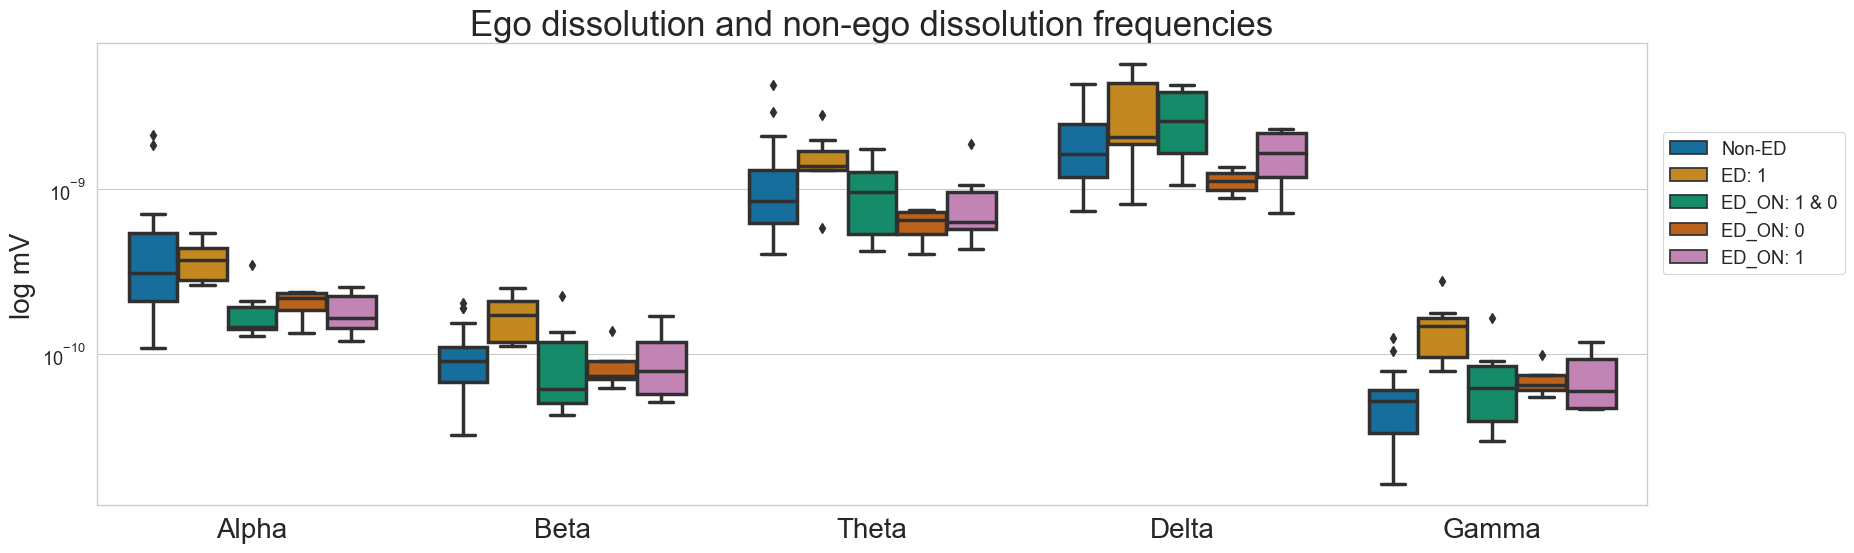

In [66]:
####Create boxplot of ED and non-ED####

#Convert all the frequencies to alpha, beta, theta, delta and gamma
#Alpha: 8-12 Hz
#Beta: 13-30 Hz
#Theta: 4-7 Hz
#Delta: 1-3 Hz
#Gamma: 31-50 Hz


#Create a dictionary with the frequencies
freqs = {'Alpha':{'Non-ED':[], 'ED: 1':[], 'ED_ON: 1 & 0':[], 'ED_ON: 0':[], 'ED_ON: 1':[]},'Beta':{'Non-ED':[], 'ED: 1':[], 'ED_ON: 1 & 0':[], 'ED_ON: 0':[], 'ED_ON: 1':[]},'Theta':{'Non-ED':[], 'ED: 1':[], 'ED_ON: 1 & 0':[], 'ED_ON: 0':[], 'ED_ON: 1':[]},'Delta':{'Non-ED':[], 'ED: 1':[], 'ED_ON: 1 & 0':[], 'ED_ON: 0':[], 'ED_ON: 1':[]},'Gamma':{'Non-ED':[], 'ED: 1':[], 'ED_ON: 1 & 0':[], 'ED_ON: 0':[], 'ED_ON: 1':[]}}
for cond in psdss.keys():
    for psd in psdss[cond]:
        print(psd)
        print(np.mean(psd[8:12],axis=0))
        freqs['Alpha'][cond].append(np.mean(psd[8:12],axis=0))
        freqs['Beta'][cond].append(np.mean(psd[13:30],axis=0))
        freqs['Theta'][cond].append(np.mean(psd[4:7],axis=0))
        freqs['Delta'][cond].append(np.mean(psd[1:3],axis=0))
        freqs['Gamma'][cond].append(np.mean(psd[31:50],axis=0))

# Convert the dictionary to a long-form dataframe
df = pd.DataFrame([(k1, k2, x) for k1,v1 in freqs.items() for k2,v2 in v1.items() for x in v2], columns=['Frequency', 'Condition', 'Value'])
# Create a grouped boxplot
sns.boxplot(x='Frequency', y='Value', hue='Condition', data=df, palette="colorblind")
# Get the current axis object
ax = plt.gca()
# Set the size of minor x-axis ticks
ax.tick_params(axis='x', which='major', labelsize=20)
plt.xlabel(None)
plt.yscale('log')
plt.ylabel('log mV', size=20)
plt.legend(loc=(1.01, 0.5))
plt.title('Ego dissolution and non-ego dissolution frequencies', size=25)
# Resize the figure to a specific size
plt.gcf().set_size_inches(20, 6) 
#Save the plot to a file
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\psd_ed_comparison_boxplot.png',dpi=300)
# Show the plot
plt.show()


In [ ]:
file_path = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\BadEpochsRejected\\DataB_AutoRej.pkl'
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

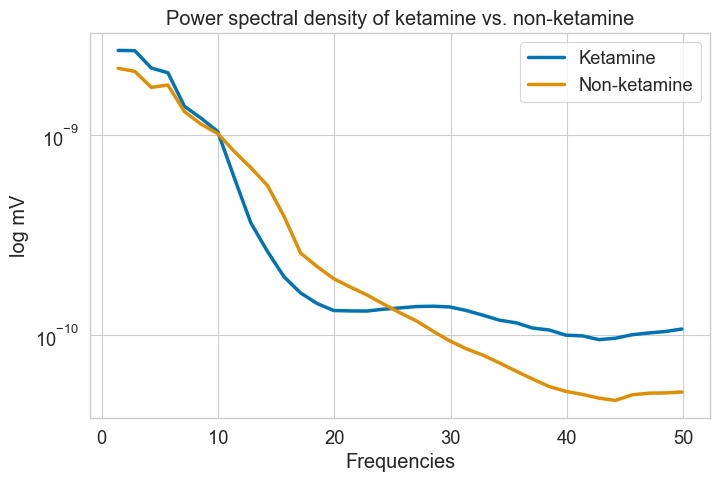

In [70]:
#Psd between ket and non-ket

#Categorize data by ket or non-ket
Ketictary = {'Ket':[],'No-ket':[]}
for cond in DataAd.keys():
    for pers in DataAd[cond]:
        psds, sfreq = mne.time_frequency.psd_array_multitaper(DataAd[cond][pers],sfreq=500, fmin=1, fmax=50)
        if cond == 'SED_1' or cond == 'SED_2' or cond == 'SED_3' or cond == 'SED_4':
            Ketictary['Ket'].append(np.mean(np.mean(psds,axis=0),axis=0))
        else:
            Ketictary['No-ket'].append(np.mean(np.mean(psds,axis=0),axis=0))
#plot the psd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("colorblind")

sns.lineplot(x=sfreq,y=list(np.mean(Ketictary['Ket'],axis=0).T),label='Ketamine')
sns.lineplot(x=sfreq,y=list(np.mean(Ketictary['No-ket'],axis=0).T),label='Non-ketamine')
plt.yscale('log')
plt.xlabel('Frequencies')
plt.ylabel('log mV')
plt.title('Power spectral density of ketamine vs. non-ketamine', loc='center')
plt.legend()
# Resize the figure to a specific size
plt.gcf().set_size_inches(8, 5) # 6 inches by 4 inches

# Save the plot to a file
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\psd_ket_comparison.png',dpi=300)

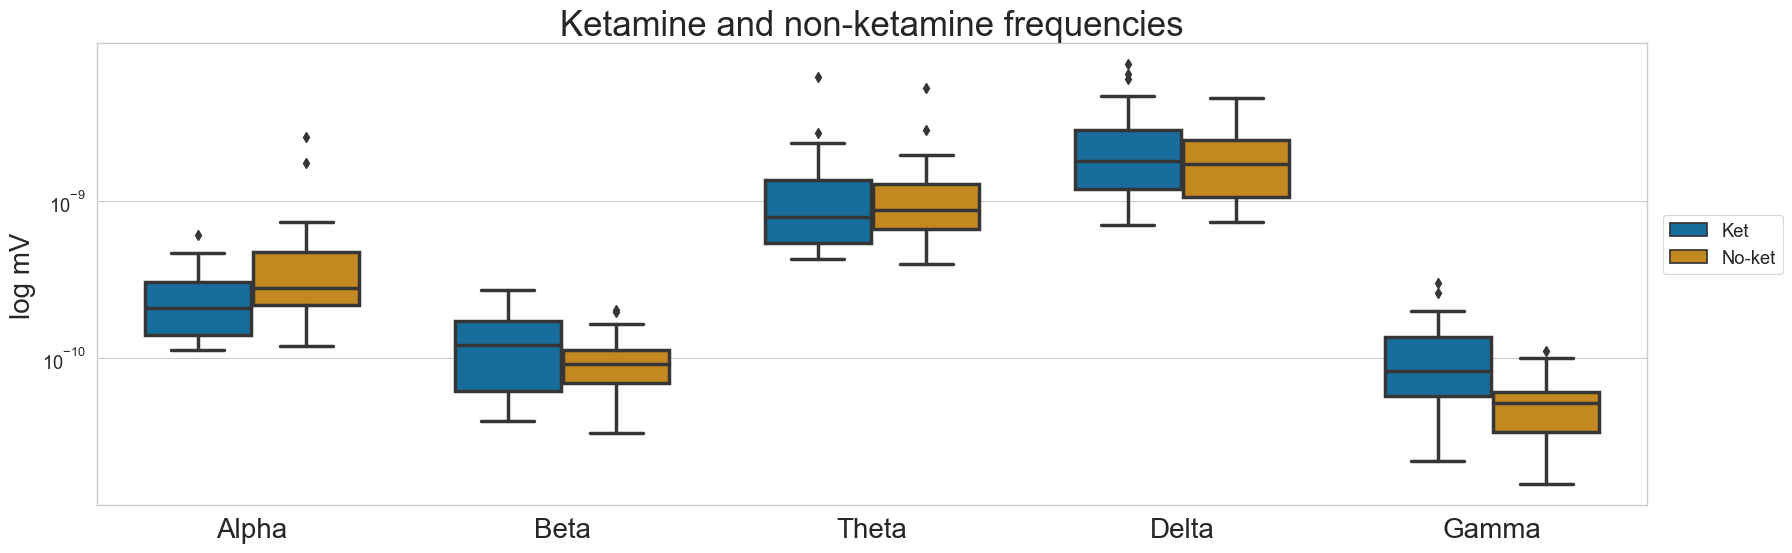

In [81]:
#Now do the same for the boxplot
#Create a dictionary with the frequencies
freqs = {'Alpha':{'Ket':[], 'No-ket':[]},'Beta':{'Ket':[], 'No-ket':[]},'Theta':{'Ket':[], 'No-ket':[]},'Delta':{'Ket':[], 'No-ket':[]},'Gamma':{'Ket':[], 'No-ket':[]}}
for cond in Ketictary.keys():
    for psd in Ketictary[cond]:
        freqs['Alpha'][cond].append(np.mean(psd[8:12],axis=0))
        freqs['Beta'][cond].append(np.mean(psd[13:30],axis=0))
        freqs['Theta'][cond].append(np.mean(psd[4:7],axis=0))
        freqs['Delta'][cond].append(np.mean(psd[1:3],axis=0))
        freqs['Gamma'][cond].append(np.mean(psd[31:50],axis=0))

# Convert the dictionary to a long-form dataframe
df = pd.DataFrame([(k1, k2, x) for k1,v1 in freqs.items() for k2,v2 in v1.items() for x in v2], columns=['Frequency', 'Condition', 'Value'])
# Create a grouped boxplot
sns.boxplot(x='Frequency', y='Value', hue='Condition', data=df, palette="colorblind", width=0.7)
# Get the current axis object
ax = plt.gca()
# Set the size of minor x-axis ticks
ax.tick_params(axis='x', which='major', labelsize=20)
plt.xlabel(None)
plt.yscale('log')
plt.ylabel('log mV', size=20)
plt.legend(loc=(1.01, 0.5))
plt.title('Ketamine and non-ketamine frequencies', size=25)
# Resize the figure to a specific size
plt.gcf().set_size_inches(20, 6)
# Save the plot to a file
plt.savefig('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\psd_ket_comparison_boxplot.png',dpi=300)